In [2]:
import sys
sys.path.append('../lib/python/')

import moving_edges

import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from tabulate import tabulate

plt.rcParams['mathtext.fontset'] = 'cm'
import os
save_filepath = os.getcwd() + "/../figures/"


plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42



In [3]:
stimulus_df = pd.read_csv(r'../tiled_edge_stimuli.csv')

stimulus_df['Shape'] = stimulus_df['Shape'].map(lambda shape: list(map(int, shape.split(',')))) #convert shape to int list
stimulus_df['stimulus code'] = stimulus_df['stimulus code'].map(lambda code: list(map(int, code.strip('[]').split(',')))) #convert stimulus code to int list
stimulus_df.index = range(1, stimulus_df.shape[0] + 1)
stimulus_df['T'] = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]) == 1
stimulus_df['C'] = np.array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]) == 1
stimulus_df['CT'] = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XT'] = np.array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XC'] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XCT'] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]) == 1



def count_net_light_dark(stimulus_code):
    reshaped = np.reshape(stimulus_code, [-1, 2])
    net_light = 0
    net_dark = 0
    for cell in reshaped:
        if cell[0] == 1:
            net_light += cell[1]
        elif cell[0] == -1:
            net_dark += cell[1]
    return (net_light, net_dark)

stimulus_df[['net light', 'net dark']] = [count_net_light_dark(stimulus_df.loc[i, 'stimulus code']) for i in stimulus_df.index]
stimulus_df

,Stimulus type,Shape,stimulus code,net movement,discontinuity fraction,T,C,CT,XT,XC,XCT,net light,net dark
1,"T, net zero 1","[2, 4]","[1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1,...",0,0.0,True,False,False,False,False,False,0,0
2,"T, net zero 2","[2, 4]","[1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, ...",0,0.0,True,False,False,False,False,False,-2,2
3,"C, net zero","[2, 4]","[1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, ...",0,0.0,False,True,False,False,False,False,0,0
4,"C, net motion","[2, 4]","[1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -...",4,0.0,False,True,False,False,False,False,2,2
5,"TC, net zero 1","[2, 4]","[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, ...",0,0.0,False,False,True,False,False,False,0,0
6,"TC, net zero 2","[2, 4]","[1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1,...",0,0.5,False,False,True,False,False,False,0,0
7,"TX, net zero","[2, 4]","[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1,...",0,0.0,False,False,False,True,False,False,0,0
8,"TX, net motion","[2, 4]","[1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -...",4,0.0,False,False,False,True,False,False,2,2
9,"CX, net zero 1","[2, 4]","[1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1,...",0,0.0,False,False,False,False,True,False,2,-2
10,"CX, net zero 2","[2, 4]","[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1,...",0,0.0,False,False,False,False,True,False,2,-2


In [4]:
modified_stimulus_df = stimulus_df[['Shape', 'stimulus code', 'net movement', 'net light', 'net dark', 'T', 'C', 'CT', 'XT', 'XC', 'XCT']].copy()
modified_stimulus_df.loc[:, ['T', 'C', 'CT', 'XT', 'XC', 'XCT']] = [['●' if i else '' for i in row] for row in modified_stimulus_df.loc[:, ['T', 'C', 'CT', 'XT', 'XC', 'XCT']].values]
modified_stimulus_df.loc[:, ['net movement', 'net light', 'net dark']] = [[i if i else '' for i in row] for row in modified_stimulus_df.loc[:, ['net movement', 'net light', 'net dark']].values]

#modified_stimulus_df.loc[:, ['net edges', 'net light', 'net dark']] = [row for row in modified_stimulus_df.loc[:, ['net light', 'net dark']].values]

modified_stimulus_df = modified_stimulus_df.rename(
    {
        'stimulus code': 'Stimulus code',
        'net movement': 'Net edges',
        'T': '$\Theta$ symmetric',
        'C': '$\Gamma$ symmetric',
        'CT': '$\Gamma\Theta$ symmetric',
        'XT': '$\chi\Theta$ symmetric',
        'XC': '$\chi\Gamma$ symmetric',
        'XCT': '$\chi\Gamma\Theta$ symmetric',
        'net light': 'Net light edges',
        'net dark': 'Net dark edges'
    },
    axis = 1
)

In [5]:
plt.rcParams['font.size'] = '60'

for i in stimulus_df.index:
    code = stimulus_df.loc[i, 'stimulus code']
    shape = stimulus_df.loc[i, 'Shape']
    if shape == (2, 4):
        figsize = (5, 5)
        plt.figure().set_figwidth(5)
    else:
        figsize = (2, 5)
        plt.figure().set_figwidth(5)
    
    moving_edges.display_stimulus(code, shape, '', 1, 1)
    
    #plt.ylabel(None)
    #plt.xlabel(None)
    #plt.xticks(ticks = [0, 1], labels =["", ""])
    #plt.yticks(ticks = [0, 1], labels =["", ""])
    ax = plt.gca()
    ax.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
    #ax.ticklabel_format(useOffset=False, style="plain")
    ax.set_aspect('equal')
    #plt.tight_layout()
    [x.set_linewidth(3) for x in ax.spines.values()]

    plt.title('$S_{' + str(i) + '}$', x=0.5, y=1.1)
    plt.savefig(save_filepath + 'table1/all_stimuli_xtplots/s' + str(i) + '.png', bbox_inches = 'tight', transparent = True, pad_inches = 0.4)
    plt.savefig(save_filepath + 'table1/all_stimuli_xtplots/s' + str(i) + '.pdf', bbox_inches = 'tight', transparent = True, pad_inches = 0.4)
    plt.close()


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very l

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


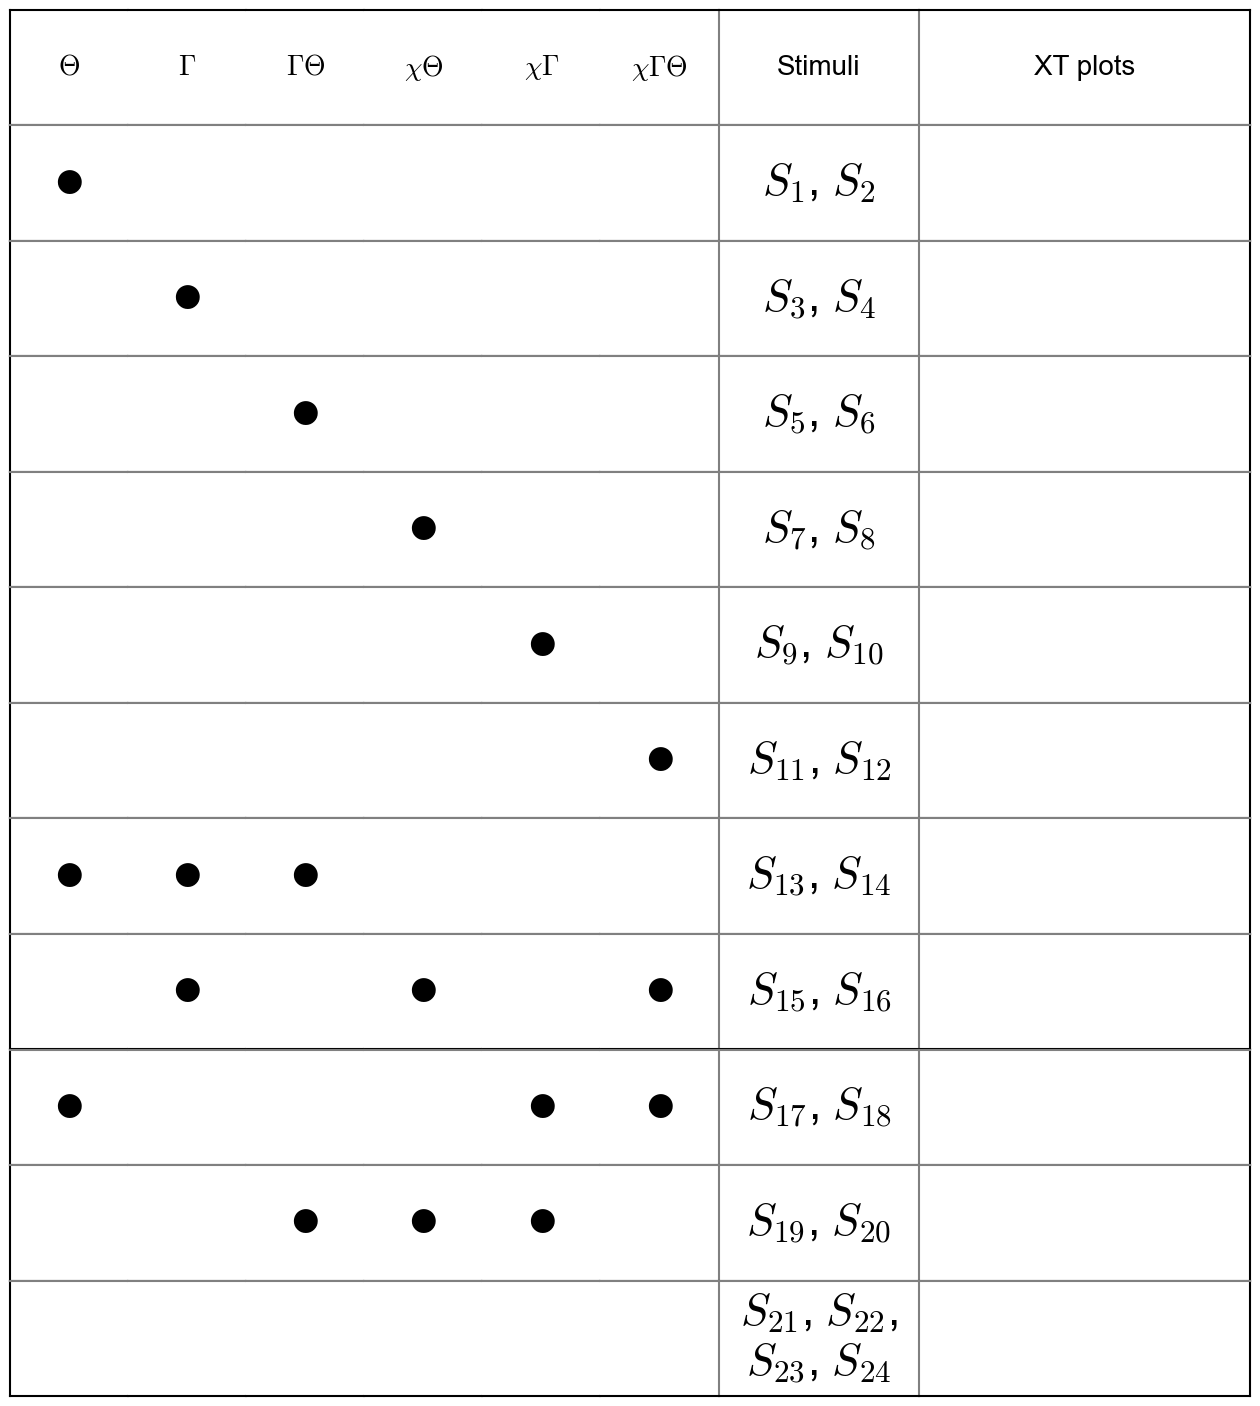

In [10]:
headers = ['$\Theta$',
            '$\Gamma$',
            '$\Gamma\Theta$',
            '$\chi\Theta$',
            '$\chi\Gamma$',
            '$\chi\Gamma\Theta$',
            'Stimuli',
            'XT plots',
        ]

stimuli_numbers = [
    '$S_1$, $S_2$',
    '$S_3$, $S_4$',
    '$S_5$, $S_6$',
    '$S_7$, $S_8$',
    '$S_9$, $S_{10}$',
    '$S_{11}$, $S_{12}$',
    '$S_{13}$, $S_{14}$',
    '$S_{15}$, $S_{16}$',
    '$S_{17}$, $S_{18}$',
    '$S_{19}$, $S_{20}$',
    '$S_{21}$, $S_{22}$,\n$S_{23}$, $S_{24}$',
]
plt.rcParams['font.size'] = '10'

fig, axes = plt.subplots(ncols=8, nrows=12, figsize=(16,18),
                         gridspec_kw={"width_ratios":[1,1, 1, 1, 1, 1, 1.7, 2.8]})
fig.subplots_adjust(wspace=0, hspace=0)

for i, ax in enumerate(axes.flatten()):
    ax.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
    ax.ticklabel_format(useOffset=False, style="plain")
    for direction,s in ax.spines.items():
        #if direction == 'right' or direction == 'left':
        s.set_linewidth(1.5)
        if i%8 > 0:
            if direction == 'left':
                if i%8 == 6 or i%8 == 7:
                    s.set_color('grey')
                else:
                    s.set_visible(False)
        if i >= 8:
            if direction == 'top':
                s.set_color('grey')
        
        if i%8 < 7:
            if direction == 'right':
                s.set_visible(False)

        
    


text_kw = dict(ha="center", va="center")



symmetry_patterns_flattened = modified_stimulus_df.iloc[:, 5:].drop_duplicates().values.flatten()
for i, ax in enumerate(axes[1:, 0:6].flatten()):
    ax.text(0.5, 0.5, symmetry_patterns_flattened[i], transform = ax.transAxes, **text_kw, size = 40)

for i, ax in enumerate(axes[1:, 6]):
    ax.text(0.5, 0.5, stimuli_numbers[i], transform = ax.transAxes, **text_kw, size = 32)

stimuli_numbers_for_display = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
# for i, ax in enumerate(axes[1:, 7]):
    
#     stimulus_number = stimuli_numbers_for_display[i]
#     im = image.imread(save_filepath + 'all_stimuli_xtplots/s' + str(stimulus_number) + '.png')

#     # ax.imshow(im)

    #for direction,s in ax.spines.items():
    #    s.set_visible(False)

# for i,ax in enumerate(axes[:,0]):
#     ax.text(0.5, 0.05, col1[i], transform=ax.transAxes, **text_kw)
# for i,ax in enumerate(axes[:,1]):
#     ax.text(0.5, 0.05, "{:.2f}".format(col2[i]),transform=ax.transAxes, **text_kw)

# axes[-1,-1].text(0.5, 0.05, finalsc,transform=axes[-1,-1].transAxes, **text_kw)

# for i,ax in enumerate(axes[:-1,2]):
#     ax.plot(data[:,i], color="green", linewidth=1)

# for i in range(1, 13):
#     border = fig.add_subplot(12, 1, i)
#     border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
#     border.set_facecolor("None")
#     for direction,s in border.spines.items():
#         s.set_color('grey')
#         s.set_linewidth(1.5)

# border = fig.add_subplot(1, 1, 1)
# border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
# border.set_facecolor("None")
# for direction,s in border.spines.items():
#     s.set_linewidth(1.5)


#headers
for i, ax in enumerate(axes[0,:]):
    ax.text(0.5, 0.5, headers[i], transform = ax.transAxes, **text_kw, size = 20)


plt.savefig(save_filepath + 'table1/symmetry_table.pdf', bbox_inches = 'tight')

plt.show()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


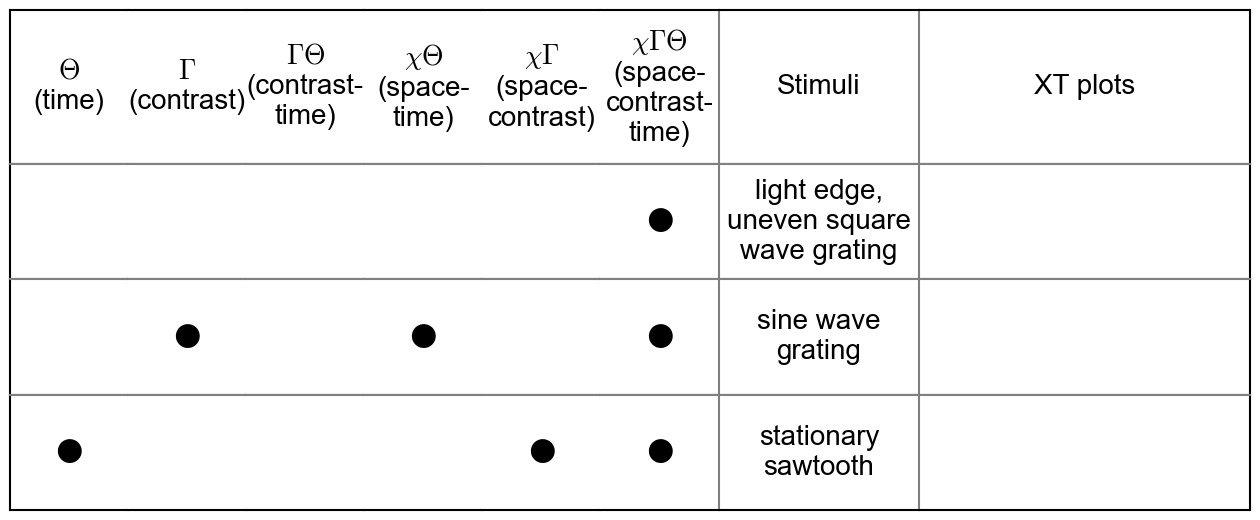

In [11]:
headers = ['$\Theta$\n(time)',
            '$\Gamma$\n(contrast)',
            '$\Gamma\Theta$\n(contrast-\ntime)',
            '$\chi\Theta$\n(space-\ntime)',
            '$\chi\Gamma$\n(space-\ncontrast)',
            '$\chi\Gamma\Theta$\n(space-\ncontrast-\ntime)',
            'Stimuli',
            'XT plots',
        ]
#sinewave, squarewave: xt, c, xct
#stationary sawtooth: t, xc, xct
#Jittered sawtooth: t, xc, xct
#Sawtooth grating: xct
#Opposing edges: t, xc, xct
#single edge: xct
#Uneven grating: xct

#xct: sawtooth grating, single edge, uneven square grating
#c, xt, xct: sinewave/square wave
#t, xc, xct: stationary sawtooth, jittered sawtooth, opposing edges


#c, xt, xct: sinewave/square wave
#t, xc, xct: stationary sawtooth, jittered sawtooth, opposing edges
#xct: sawtooth grating, single edge, uneven square grating

stimuli_numbers = [
    'light edge,\nuneven square\nwave grating',
    'sine wave\ngrating',
    'stationary\nsawtooth'
]
plt.rcParams['font.size'] = '10'

fig, axes = plt.subplots(ncols=8, nrows=4, figsize=(16,6.5),
                         gridspec_kw={"width_ratios":[1,1, 1, 1, 1, 1, 1.7, 2.8], "height_ratios": [4, 3, 3, 3]})
fig.subplots_adjust(wspace=0, hspace=0)

for i, ax in enumerate(axes.flatten()):
    ax.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
    ax.ticklabel_format(useOffset=False, style="plain")
    for direction,s in ax.spines.items():
        #if direction == 'right' or direction == 'left':
        #s.set_visible(False)
        s.set_linewidth(1.5)
        if i%8 > 0:
            if direction == 'left':
                if i%8 == 6 or i%8 == 7:
                    s.set_color('grey')
                else:
                    s.set_visible(False)
        if i >= 8:
            if direction == 'top':
                s.set_color('grey')

        if i%8 < 7:
            if direction == 'right':
                s.set_visible(False)
        

        
    


text_kw = dict(ha="center", va="center")



previous_symmetry_patterns_flattened = ['', '', '','','','●',
                                        '', '●', '', '●', '', '●',
                                        '●', '', '', '', '●', '●',                                        
                                        ]
for i, ax in enumerate(axes[1:, 0:6].flatten()):
    ax.text(0.5, 0.5, previous_symmetry_patterns_flattened[i], transform = ax.transAxes, **text_kw, size = 40)

for i, ax in enumerate(axes[1:, 6]):
    ax.text(0.5, 0.5, stimuli_numbers[i], transform = ax.transAxes, **text_kw, size = 20)

stimuli_numbers_for_display = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
# for i, ax in enumerate(axes[1:, 7]):
    
#     stimulus_number = stimuli_numbers_for_display[i]
#     im = image.imread(save_filepath + 'all_stimuli_xtplots/s' + str(stimulus_number) + '.png')

#     ax.imshow(im)

#     for direction,s in ax.spines.items():
#         s.set_visible(False)

# for i,ax in enumerate(axes[:,0]):
#     ax.text(0.5, 0.05, col1[i], transform=ax.transAxes, **text_kw)
# for i,ax in enumerate(axes[:,1]):
#     ax.text(0.5, 0.05, "{:.2f}".format(col2[i]),transform=ax.transAxes, **text_kw)

# axes[-1,-1].text(0.5, 0.05, finalsc,transform=axes[-1,-1].transAxes, **text_kw)

# for i,ax in enumerate(axes[:-1,2]):
#     ax.plot(data[:,i], color="green", linewidth=1)

# for i in range(1, 5):
#     border = fig.add_subplot(4, 1, i)
#     border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
#     border.set_facecolor("None")
#     for direction,s in border.spines.items():
#         s.set_color('grey')
#         s.set_linewidth(1.5)

# border = fig.add_subplot(1, 1, 1)
# border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
# border.set_facecolor("None")
# for direction,s in border.spines.items():
#     s.set_linewidth(1.5)


#headers
for i, ax in enumerate(axes[0,:]):
    ax.text(0.5, 0.5, headers[i], transform = ax.transAxes, **text_kw, size = 20)


plt.savefig(save_filepath + 'table1/previous_stim_symmetry_table.pdf', bbox_inches = 'tight')

plt.show()

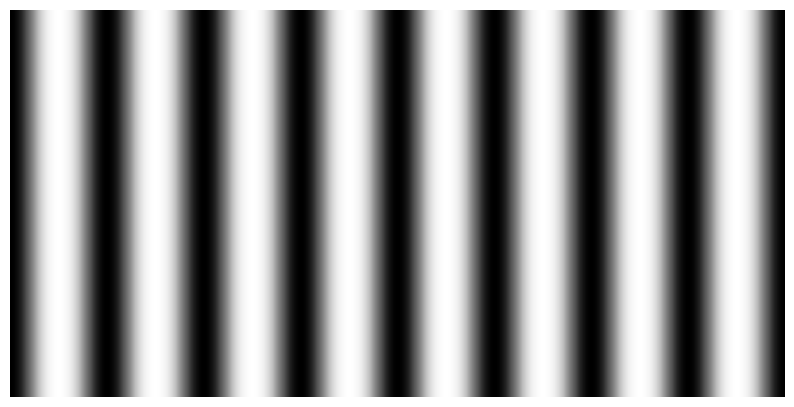

In [12]:
#sine wave grating
arr = np.zeros((1440, 720))
fig = plt.figure(figsize = (10, 10))
for i in range(0, arr.shape[0]):
    arr[i] = np.repeat(np.cos((i/180) * 2 * np.pi), arr.shape[1])

plt.imshow(np.transpose(arr), cmap = 'Greys')
plt.axis('off')

plt.savefig(save_filepath + 'table1/sinewave_grating.pdf', bbox_inches = 'tight')

plt.show()
